# Rasterio

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/giswqs/geog-312/blob/main/book/geospatial/rasterio.ipynb)

## Overview

[Rasterio](https://rasterio.readthedocs.io/) is a Python library that allows you to read, write, and analyze geospatial raster data. Built on top of [GDAL](https://gdal.org) (Geospatial Data Abstraction Library), it provides an efficient interface to work with raster datasets, such as satellite images, digital elevation models (DEMs), and other gridded data. Rasterio simplifies common geospatial tasks and helps to bridge the gap between raw geospatial data and analysis, especially when combined with other Python libraries like `numpy`, `pandas`, and `matplotlib`.

Raster data is essentially a grid of pixels (cells), where each pixel contains a value representing some geographic information such as elevation, temperature, or reflectance. Rasterio provides an easy way to handle these data types while preserving their georeferenced characteristics.

## Learning Objectives

By the end of this lecture, you should be able to:

- Read, write, and manipulate raster datasets using the Rasterio library.
- Extract metadata and perform operations on raster bands.
- Visualize raster datasets and overlay them with vector data.
- Perform geospatial operations such as clipping, reprojecting, and raster algebra.
- Apply Rasterio to practical geospatial analysis tasks, such as calculating indices and manipulating raster data for specific use cases.

## Installation

Before working with Rasterio, you need to install the library. You can do this by running the following command in your Python environment. Uncomment the line below if you're working in a Jupyter notebook or other interactive Python environment.

In [ ]:
# %pip install rasterio fiona

## Importing libraries

To get started, you'll need to import rasterio along with a few other useful Python libraries. These libraries will allow us to perform different types of geospatial operations, manipulate arrays, and visualize raster data.

In [1]:
import rasterio
import rasterio.plot
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import os

* `rasterio`: The main library for reading and writing raster data.
* `rasterio.plot`: A submodule of Rasterio for plotting raster data.
* `geopandas`: A popular library for handling vector geospatial data.
* `numpy`: A powerful library for array manipulations, which is very useful for raster data.
* `matplotlib`: A standard plotting library in Python for creating visualizations.

## **How to Find Band Descriptions:**
Some files come with descriptive labels for each band. Rasterio exposes these through the descriptions attribute:

In [ ]:
# for band in src.indexes:
#         tags = src.tags(band)
#         print(f"Metadata for band {band}: {tags}")

**Using Band-Specific Tags:**
Additionally, individual bands might carry extra metadata using GDAL tags. You can check each band’s tags like this:

In [1]:
# for idx, desc in enumerate(src.descriptions, start=1):
#         print(f"Band {idx}: {desc}")

## How to choose between plot by Matplotlib and raster.plot with rasterio.plot.show()

When working with geospatial raster data, you have a couple of ways to visualize it using Python. One option is to use the general plotting functions provided by libraries like Matplotlib (for example, using `plt.imshow()`), and the other is to use the specialized routines in Rasterio’s plotting module (typically via functions in `rasterio.plot`, such as `rasterio.plot.show()`). 

- rasterio.plot:
    - Purpose-built for geospatial imagery
    - Automatically applies the affine transformation to set the correct geographic extent
    - Handles nodata values and color mapping tailored to remote sensing data
    - Provides additional utilities like histogram plotting and multi-band composite functions

- Generic Plotting (Matplotlib’s plot functions):
    - General-purpose visualization
    - Requires manual intervention to integrate geospatial information (e.g., computing extents, handling nodata)
    - Doesn’t interpret geospatial metadata automatically

In essence, if you’re working with geospatial raster data and you want your plots to reflect the correct geographic context with minimal extra code, using functions from rasterio.plot is typically more convenient. However, if you need more control or are working with non-geospatial image data, then generic plotting functions from Matplotlib will suffice.

## Exercises

**Sample datasets**

- Single-band image (DEM): https://github.com/opengeos/datasets/releases/download/raster/dem_90m.tif
- Multispectral image (Landsat): https://github.com/opengeos/datasets/releases/download/raster/cog.tif

**Exercise 1: Reading and Exploring Raster Data**

1. Open the single-band DEM image using `rasterio`.
2. Retrieve and print the raster metadata, including the CRS, resolution, bounds, number of bands, and data types.
3. Display the raster’s width, height, and pixel data types to understand the grid dimensions and data structure.

In [6]:
# URL for the single-band DEM image
dem_url = "https://github.com/opengeos/datasets/releases/download/raster/dem_90m.tif"

# Open the DEM image using rasterio
with rasterio.open(dem_url) as dem: #temporal assignment of variable using with statement
    # Retrieve and print metadata
    print("Raster Metadata:")
    print(dem.meta)

Raster Metadata:
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': None, 'width': 4269, 'height': 3113, 'count': 1, 'crs': CRS.from_wkt('PROJCS["WGS 84 / Pseudo-Mercator",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Mercator_1SP"],PARAMETER["central_meridian",0],PARAMETER["scale_factor",1],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],EXTENSION["PROJ4","+proj=merc +a=6378137 +b=6378137 +lat_ts=0 +lon_0=0 +x_0=0 +y_0=0 +k=1 +units=m +nadgrids=@null +wktext +no_defs"],AUTHORITY["EPSG","3857"]]'), 'transform': Affine(90.0, 0.0, -13442488.3428,
       0.0, -89.99579177642138, 4668371.5775)}


In [7]:
# Let's check its band information
with rasterio.open(dem_url) as dem:
    print("\nBand Information:")
    for band in dem.indexes:
        tags = dem.tags(band)
        print(f"  Band {band}: {tags if tags else 'No extra metadata found'}")
    print("\nBand Descriptions:")
    for idx, desc in enumerate(dem.descriptions, start=1):
        print(f"  Band {idx}: {desc if desc is not None else 'No description available'}")


Band Information:
  Band 1: No extra metadata found

Band Descriptions:
  Band 1: No description available


**Exercise 2: Visualizing and Manipulating Raster Bands**

1. Visualize the single-band DEM using a custom colormap (e.g., cmap='terrain').

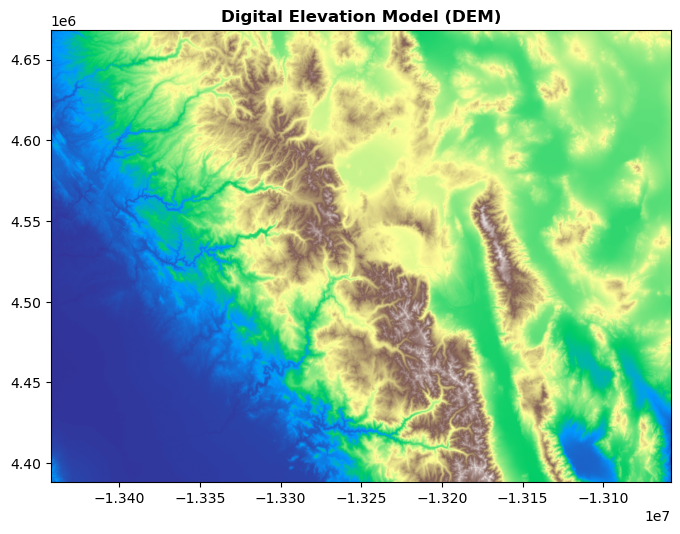

In [8]:
# Visualize the DEM using rasterio's plotting capabilities with a legend
with rasterio.open(dem_url) as dem:
    fig, ax = plt.subplots(figsize=(8, 8))
    rasterio.plot.show(dem, cmap="terrain", ax=ax, title="Digital Elevation Model (DEM)")
    plt.show()


2. Open the multispectral image and visualize the first band using a suitable colormap.


In [9]:
multi_url = "https://github.com/opengeos/datasets/releases/download/raster/cog.tif"
# Check the band information for the multi-band image
with rasterio.open(multi_url) as src_multi:
    # Retrieve and print metadata
    print("Raster Metadata:")
    print(src_multi.meta)
    print("\nBand Information:")
    for band in src_multi.indexes:
        tags = src_multi.tags(band)
        print(f"  Band {band}: {tags if tags else 'No extra metadata found'}")
    print("\nBand Descriptions:")
    for idx, desc in enumerate(src_multi.descriptions, start=1):
        print(f"  Band {idx}: {desc if desc is not None else 'No description available'}")

Raster Metadata:
{'driver': 'GTiff', 'dtype': 'float64', 'nodata': None, 'width': 343, 'height': 206, 'count': 4, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'), 'transform': Affine(8.983152841195215e-05, 0.0, 6.860074498707138,
       0.0, -8.983152841195215e-05, 53.41634207654228)}

Band Information:
  Band 1: No extra metadata found
  Band 2: No extra metadata found
  Band 3: No extra metadata found
  Band 4: No extra metadata found

Band Descriptions:
  Band 1: No description available
  Band 2: No description available
  Band 3: No description available
  Band 4: No description available


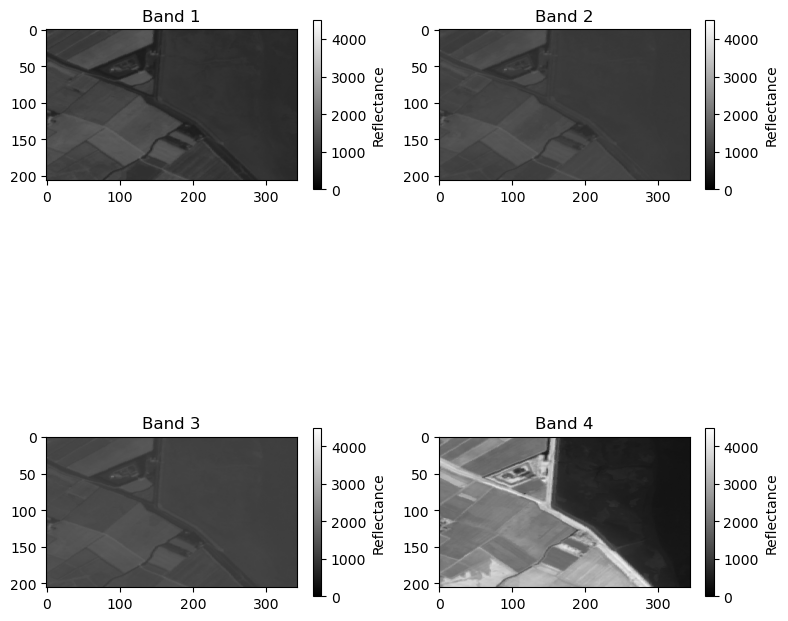

In [10]:
with rasterio.open(multi_url) as src_multi:  # Reopen the dataset
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 10))
    axes = axes.flatten()  # Flatten the 2D array of axes to 1D for easy iteration

    for band in range(1, src_multi.count + 1):  # Ensure the range includes all bands
        data = src_multi.read(band)
        ax = axes[band - 1]
        im = ax.imshow(data, cmap="gray", vmin=0, vmax=4500)
        ax.set_title(f"Band {band}")
        fig.colorbar(im, ax=ax, label="Reflectance", shrink=0.3)

    plt.tight_layout()
    plt.show()

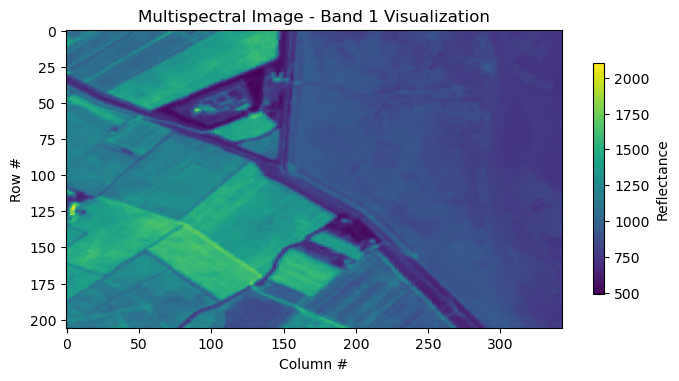

In [11]:
multi_url = "https://github.com/opengeos/datasets/releases/download/raster/cog.tif"

# 2. Open the multispectral image and visualize the first band with a suitable colormap
with rasterio.open(multi_url) as src_ms:
    band1 = src_ms.read(1)  # reading the first band
    plt.figure(figsize=(8, 6))
    plt.imshow(band1, cmap='viridis')
    plt.colorbar(label='Reflectance', shrink=0.5)
    plt.title("Multispectral Image - Band 1 Visualization")
    plt.xlabel("Column #")
    plt.ylabel("Row #")
    plt.show()

In [12]:
# Check the range of the band values
with rasterio.open(multi_url) as src_ms:
    # Create a for loop to iterate through the bands for their min/max values 
    # and incorporate nodata handling
    print("Band Value Ranges:")
    for band in src_ms.indexes:
        band_data = src_ms.read(band)
        nodata = src_ms.nodata
        if nodata is not None:
            valid_data = band_data[band_data != nodata]
            print(f"Band {band} Value Range: {valid_data.min()} to {valid_data.max()}")
        else:
            print(f"Band {band} Value Range: {band_data.min()} to {band_data.max()}")

Band Value Ranges:
Band 1 Value Range: 488.0 to 2102.0
Band 2 Value Range: 735.0 to 1960.0
Band 3 Value Range: 913.5 to 2083.0
Band 4 Value Range: 336.5 to 4269.0


Educational Guess
- Band 1: Blue
- Band 2: Green
- Band 3: Red
- Band 4: NIR

- Blue Band (Typically the Shortest Wavelength):
Often registers lower absolute reflectance values, especially over vegetated or water surfaces because these wavelengths are more strongly absorbed or scattered.
- Green and Red Bands:
These bands may show moderate reflectance values, depending on the scene characteristics (e.g., vegetation often absorbs red light more strongly, so red reflectance could be lower than green, particularly in areas with healthy vegetation).
- Near-Infrared (NIR) Band:
Healthy vegetation reflects strongly in the NIR. In many images, you’ll see a higher maximum value (or a broader distribution) in the NIR band if there’s abundant vegetation in the scene.

## Explain the Reflectance to be large
- Reflectance Definition:
Reflectance is the fraction of incoming solar radiation that a surface reflects. In its pure form, reflectance values are unitless and vary from 0 (no reflection) to 1 (100% reflection).

- Why Scale Reflectance?
Floating-point numbers (ranging from 0 to 1) can be less efficient for storage and processing. By multiplying these values by a scaling factor (for example, 10,000), the data can be stored as integer values while still representing the necessary precision.

3. Combine multiple bands from the multispectral image (e.g., Red, Green, and Blue) and stack them to create an RGB composite image.

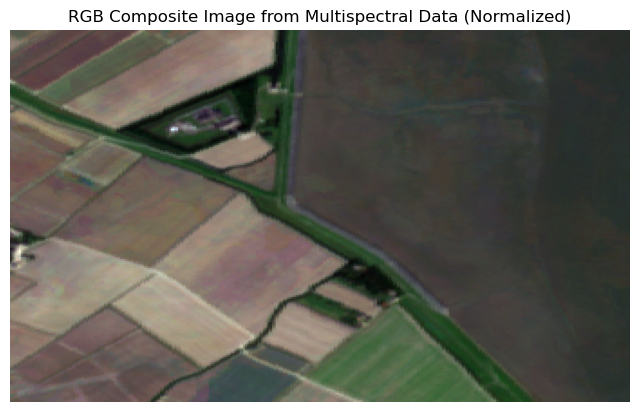

In [24]:
# 3. Visualize the first three bands as an RGB composite image

# Normalize the bands to 0-1 range for visualization
# Define a function to normalize the bands
def normalize(arr):
    """Normalize a numpy array to 0-1 range."""
    arr_min = arr.min()
    arr_max = arr.max()
    return (arr - arr_min) / (arr_max - arr_min)

with rasterio.open(multi_url) as src_ms:
    # Read the first three bands
    red = src_ms.read(1)
    green = src_ms.read(2)
    blue = src_ms.read(3)
    
    # Normalize each band
    red_norm = normalize(red)
    green_norm = normalize(green)
    blue_norm = normalize(blue)

    # Stack normalized bands along the third dimension to form an RGB image.
    rgb = np.dstack((red_norm, green_norm, blue_norm))
    
    # Display the RGB composite
    plt.figure(figsize=(8, 6))
    plt.imshow(rgb)
    plt.title("RGB Composite Image from Multispectral Data (Normalized)")
    plt.axis('off')
    plt.show()

**Exercise 4: Calculating NDWI (Band Math)**

1. Open the multispectral image and extract the Green and Near-Infrared (NIR) bands.
2. Compute the Normalized Difference Water Index ([NDWI](https://en.wikipedia.org/wiki/Normalized_difference_water_index)) using the formula:

    NDWI= (Green - NIR) / (Green + NIR)

3. Visualize the NDWI result using a water-friendly colormap (e.g., cmap='Blues') to highlight water bodies.
4. Save the resulting NDWI image as a new raster file named ndwi.tif.

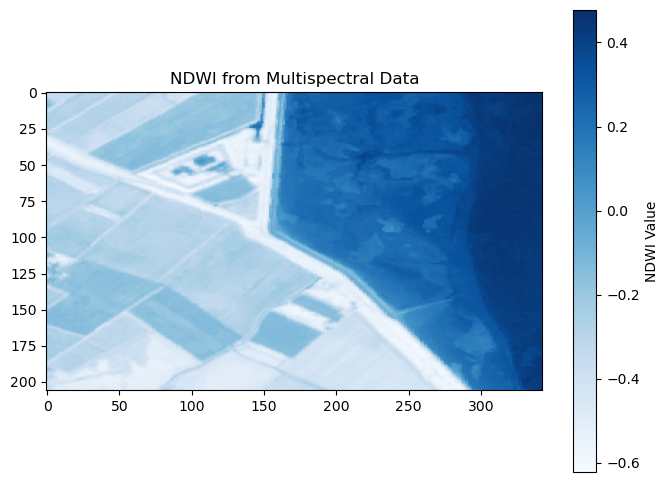

NDWI raster saved as data/ndwi.tif


In [28]:
# Open the multispectral image and extract Green (band 2) and NIR (band 4) bands
with rasterio.open(multi_url) as src_ms:
    green = src_ms.read(2).astype('float64')
    nir = src_ms.read(4).astype('float64')  
    
    # Set error handling (ignore division warnings when denominator is zero)
    np.seterr(divide='ignore', invalid='ignore')
    
    # Compute NDWI = (Green - NIR) / (Green + NIR)
    ndwi = (green - nir) / (green + nir)
    
    # Update the profile for the output file
    # In Rasterio, the "profile" is essentially a dictionary 
    # that contains metadata describing a raster file's 
    # characteristics—such as its driver, data type, 
    # coordinate reference system (CRS), dimensions (width and height), 
    # transform, number of bands (count), and other settings. 
    # When you update the profile, you're modifying this metadata 
    # to match the desired properties of the output file you plan to create.
    profile = src_ms.profile.copy()
    profile.update({
        'dtype': rasterio.float64,
        'count': 1
    })

# 3. Visualize the NDWI result using a water-friendly colormap
plt.figure(figsize=(8, 6))
plt.imshow(ndwi, cmap='Blues')
plt.colorbar(label='NDWI Value')
plt.title("NDWI from Multispectral Data")
plt.axis('on')
plt.show()

# 4. Save the NDWI image as a new raster file named 'ndwi.tif'
output_file = os.path.join("data", "ndwi.tif")
with rasterio.open(output_file, 'w', **profile) as dst:
    dst.write(ndwi.astype(rasterio.float64), 1)

print(f"NDWI raster saved as {output_file}")

## Summary

Rasterio is a powerful and flexible tool for handling geospatial raster data in Python. Whether you are visualizing satellite imagery, performing raster math, or saving new datasets, it offers a convenient interface for working with raster data. The examples and exercises provided should help you gain hands-on experience with Rasterio, enabling you to work more confidently with geospatial data in various applications.